# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Question(s) for Analysis
>1-Which genres are most popular from year to year?

>2-What kinds of properties are associated with movies that have 


In [1]:
#Importing packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
import matplotlib.ticker as mticker
from pandas.plotting import register_matplotlib_converters
from datetime import datetime
pd.options.mode.chained_assignment = None
%matplotlib inline

register_matplotlib_converters()
pd.options.mode.chained_assignment = None


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [2]:
df=pd.read_csv('tmdb-movies.csv',parse_dates=["release_date"])


In [3]:
df.head(3)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline  ...  \
0           The park is open.  ...   
1          What a Lovely Day.  ...   
2  One Choice Can Destroy You  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18       2480   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  

[3 rows x 21 columns]

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

##### Description  of columns =>
###### 1-popularity:the movie rank based on page views related to it.
###### 2-budget:the budget to the film.
###### 3-revenue:the revenue from the film.
###### 4-original_title:the title of the film.
###### 5-cast:the main cast performed the film.
###### 6-director:the director of the film. (can be more than one director)
###### 7-runtime:the duration of the film.
###### 8-genres:the genres film related to.
###### 9-production_companies:the companies produced the film.(can be more than one company)
###### 10-release_date:the release date of the film.
###### 11-vote_count & vote_average:count of vote and the vote average.
###### 12-release_year&release_month:related to release_date i
###### 13-budget_adj&revenue_adj:show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.



### Data Cleaning
 

In [5]:
df.drop(columns=['id','homepage','tagline','overview','keywords','imdb_id'],inplace=True)

-first thing to do here is to remove unnecessary columns['id','homepage','tagline','overview','keywords','imdb_id']

In [6]:
df.dropna(subset='genres',inplace=True)
df.drop_duplicates(inplace=True)

Dropping nan values from 'genres' and dropping duplicates from the whole data...

In [7]:
df['release_month']=df['release_date'].dt.month_name()

Adding release month Column because the release month is important  for our first question

In [8]:
df_H_vot=df.loc[(df['vote_average']>df['vote_average'].mean())&(df['popularity']>df['popularity'].mean())]

df_H_vot refers to all movies that has above average rate and popularity and

In [10]:
df_H_vot['genres']=df_H_vot['genres'].astype('string')

Convert genres column to STR

In [11]:
df_H_vot['genres']=df_H_vot['genres'].str.replace('|', ' ',regex=False)
df_H_vot['main_genre']=df_H_vot['genres'].str.extract(r'(^\S*)')

1-Replacing | with space in genres Col

2-Add main genre column to our data 

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 (Which genres are most popular from year to year!)

In [12]:
# this function to draw bars for categorical data.....
def bar_sea(df,col,index,xl,yl,FSN,fgs,title):
    '''
    This function draw a bar graph for any cat data and saving it as PNG formate
    ---- You need to pass prams in it as -----
    df-> data frame
    col->STR "Col_name"
    index->STR default 'index' --- Dont change it
    xl->STR"your x label"
    yl->STR"your y label"
    FSN->STR"your name for the fig"
    fgs->Tuple (,) containing your fig size
    title->STR"Your Title"
    '''
    fig,ax=plt.subplots(figsize=fgs)
    sns.set_theme(style="ticks")
    ax=sns.barplot(data=df[col].value_counts().reset_index(),x='index',y=col,)
    ax.set_xlabel(f'{xl.title()}')
    ax.set_ylabel(f'{yl.title()}')
    ax.set_title(f"{title.title()}")
    fig.savefig(f'{FSN}.png')
    return ax

In [13]:
df_H_vot.groupby('release_year')['main_genre'].value_counts().unstack(level=0).idxmax()

release_year
1960       Action
1961       Action
1962    Adventure
1963       Comedy
1964       Comedy
1965        Drama
1966        Drama
1967        Crime
1968       Horror
1969       Action
1970    Animation
1971       Action
1972        Drama
1973       Action
1974        Crime
1975    Adventure
1976        Drama
1977    Adventure
1978       Action
1979        Drama
1980       Action
1981    Adventure
1982      Science
1983       Comedy
1984        Drama
1985       Comedy
1986        Drama
1987       Comedy
1988       Action
1989    Adventure
1990        Drama
1991        Drama
1992       Comedy
1993       Action
1994       Comedy
1995        Drama
1996        Drama
1997        Drama
1998        Drama
1999        Drama
2000        Drama
2001       Comedy
2002        Drama
2003    Adventure
2004       Comedy
2005        Drama
2006        Drama
2007       Comedy
2008        Drama
2009        Drama
2010        Drama
2011        Drama
2012        Drama
2013        Drama
2014        Dra

This data frame represents the most popular Genres over years

<AxesSubplot:title={'center':'Counts Of Months'}, xlabel='Month', ylabel='Counts'>

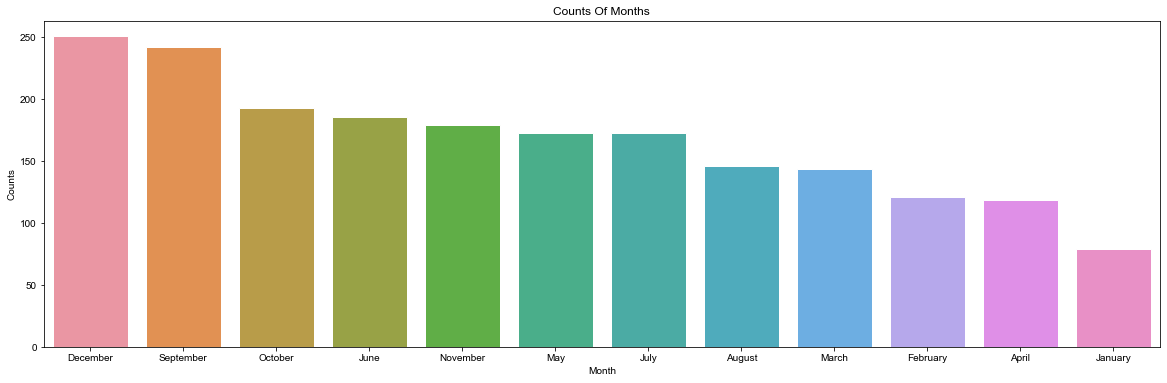

In [14]:
bar_sea(df_H_vot,'release_month','index','Month',"Counts",'months',(20,6),"counts of months")

### <font color=green>December and September are the best months to release a movie to gain high popularity ...

In [15]:
bar_sea(df_H_vot,'main_genre','index','genre',"Counts",'main_genre',(20,6),'Count of genere')

<AxesSubplot:title={'center':'Count Of Genere'}, xlabel='Genre', ylabel='Counts'>

##### Drama ,Comedy and Action took first three places as we see

In [16]:
def my_func(row):
    if row['release_year'] < 1970:
        val = '60s'
    elif row['release_year']  < 1980:
        val = '70s'
    elif row['release_year']  < 1990:
        val = '80s'
    elif row['release_year']  < 2000:
        val = '90s' 
    elif row['release_year']  < 2010:
        val = '2000s'
    else:
        val = '+2010'               
    return val

this function to add Decade col to the data set

In [17]:
df_H_vot['Decade']=df_H_vot.apply(my_func,axis=1)

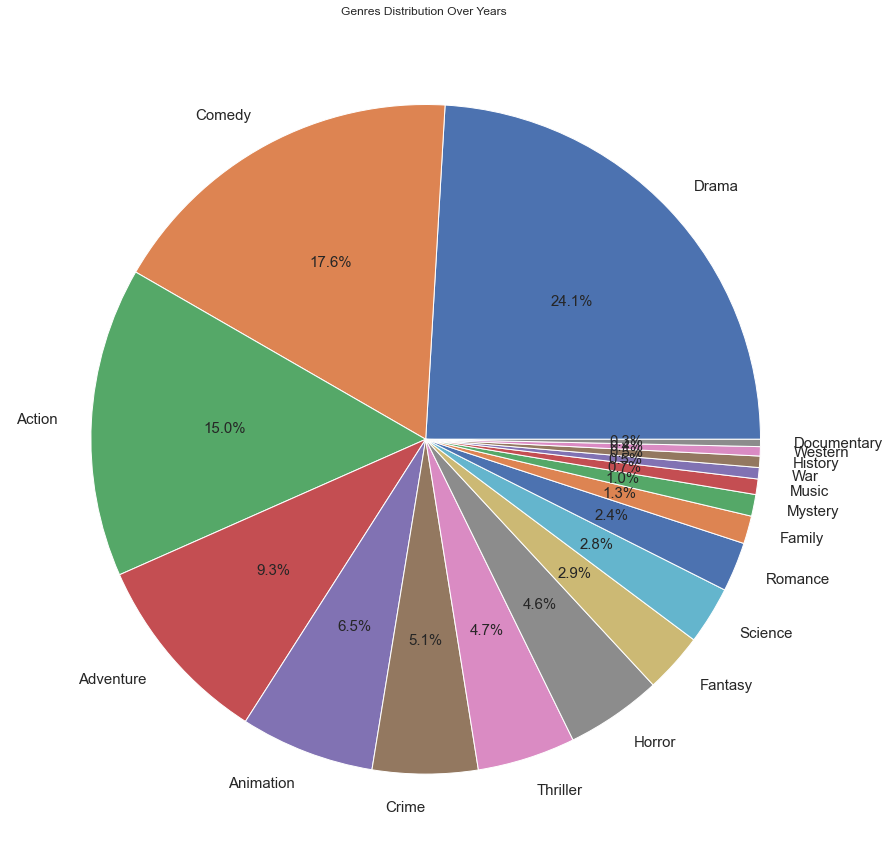

In [18]:
plt.figure(figsize=(15,18))

df_H_vot.main_genre.value_counts().plot(kind='pie',shadow=False,title='Genres Distribution Over Years ',autopct='%1.1f%%',frame=False,xticks=[],yticks=[],ylabel='',fontsize=15,)
plt.savefig('pie_chart_genres.png')

#### <font color=green> As we see Drama,Comedy and Action took first places with this Percentages 

In [19]:
df3=df_H_vot.groupby('Decade',)['main_genre'].value_counts()
df3=df3.unstack(level=-1)

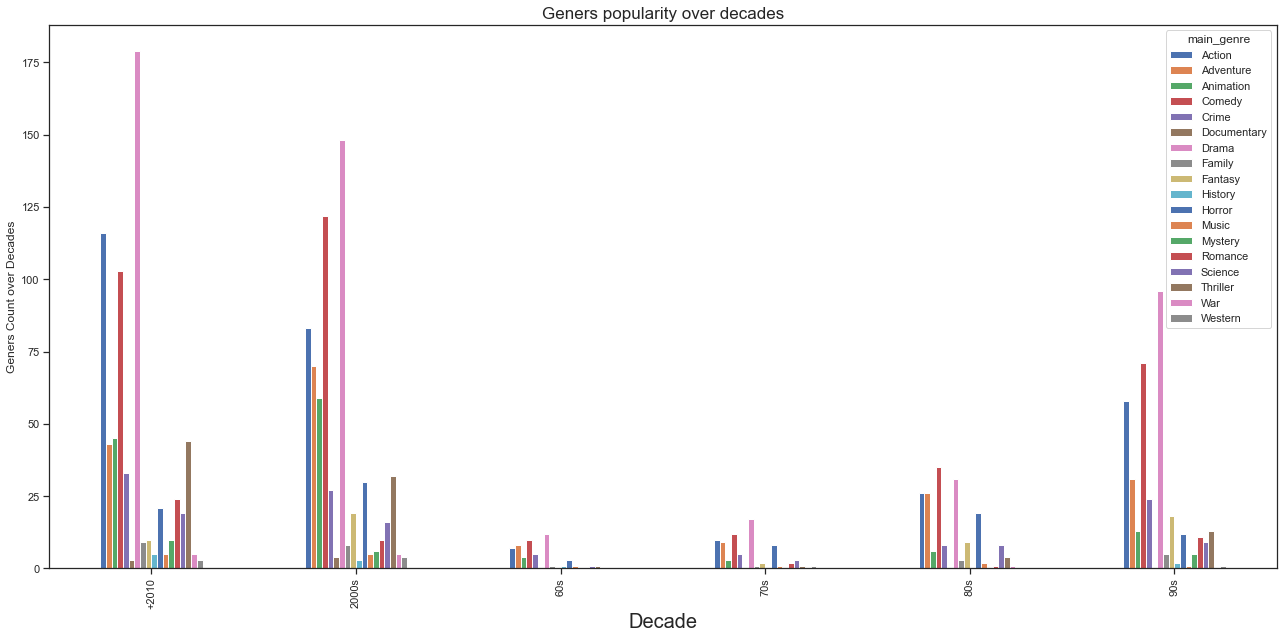

In [20]:
fig = df3.plot(kind ="bar", legend = True, figsize = (22, 10),).figure
sns.set_theme(style="ticks")
plt.xlabel("Decade", fontsize= 20)
plt.ylabel("Geners Count over Decades", fontsize= 12)
plt.title('Geners popularity over decades',fontsize= 17)
fig.savefig('gener_by_Decades_pop.png')

###   This Bar chart representing the most popular genres over decades

In [21]:
fig,ax=plt.subplots(figsize=(20, 6))
ax=sns.barplot(data=df_H_vot.sort_values(by='popularity',ascending=False).head(25),x='original_title',y='popularity',)
ax.set_xlabel("Movie Title")
ax.set_ylabel("Popularity")
ax.set_title("Top 25 Movie")
for i in ax.get_xticklabels():
    i.set_rotation(90)
fig.savefig("Best 25 movie.png")    

#### <font color=cyan> Best 25 movies Based on their popularity.....

## <font color=green>  From Analysis we found that...
### <font color=teal>Drama is the most popular genre, following by Comedy and Action

### Research Question 2  (What kinds of properties associated with movies that have high revenues?)

In [22]:
dfr=df.copy()

dfr refers to data for revenue

In [23]:
dfr.describe()

popularity        budget       revenue       runtime    vote_count  \
count  10842.000000  1.084200e+04  1.084200e+04  10842.000000  10842.000000   
mean       0.647461  1.465531e+07  3.991138e+07    102.138443    217.823649   
std        1.001032  3.093971e+07  1.171179e+08     31.294612    576.180993   
min        0.000065  0.000000e+00  0.000000e+00      0.000000     10.000000   
25%        0.208210  0.000000e+00  0.000000e+00     90.000000     17.000000   
50%        0.384532  0.000000e+00  0.000000e+00     99.000000     38.000000   
75%        0.715393  1.500000e+07  2.414118e+07    111.000000    146.000000   
max       32.985763  4.250000e+08  2.781506e+09    900.000000   9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count  10842.000000  10842.000000  1.084200e+04  1.084200e+04  
mean       5.974064   2001.314794  1.758712e+07  5.147797e+07  
std        0.934257     12.813617  3.433437e+07  1.447723e+08  
min        1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%        5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%        6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%        6.600000   2011.000000  2.092507e+07  3.387838e+07  
max        9.200000   2015.000000  4.250000e+08  2.827124e+09

In [24]:
dfr[['budget','revenue','runtime']]=dfr[['budget','revenue','runtime']].replace(0,np.NAN)

Replacing Zeros with Nan

In [25]:

dfr.dropna(subset=['budget','revenue','runtime',"production_companies",'cast','director'],inplace=True)
dfr.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
release_month           0
dtype: int64

Drop all rows containing Nan values based on ['budget','revenue','runtime',"production_companies",'cast','director'] columns

In [26]:
dfr['genres']=dfr['genres'].str.replace('|', ' ',regex=False)
dfr['main_genre']=dfr['genres'].str.extract(r'(^\S*)')
dfr['cast']=dfr['cast'].str.replace('|', ',',regex=False)
dfr['main_actor']=dfr['cast'].str.extract(r'^(.+?),')
dfr['Decade']=dfr.apply(my_func,axis=1)

In [27]:
dfr=dfr.loc[dfr['revenue']>dfr['revenue'].mean()]

Adding main genre,main actor and Decade columns 

In [28]:
dfr=dfr.sort_values(by='revenue',ascending=False)

Sorting our data according to revenue

Now we are ready to answering our second question

In [29]:
dfr.describe()

popularity        budget       revenue      runtime   vote_count  \
count  1095.000000  1.095000e+03  1.095000e+03  1095.000000  1095.000000   
mean      2.201642  7.449737e+07  2.954684e+08   115.606393  1250.768950   
std       2.221929  5.465937e+07  2.412660e+08    21.166688  1284.627864   
min       0.131526  1.130000e+02  1.089795e+08    72.000000    14.000000   
25%       1.074489  3.410000e+07  1.504451e+08    99.500000   392.500000   
50%       1.618371  6.000000e+07  2.118179e+08   113.000000   790.000000   
75%       2.565033  1.000000e+08  3.485801e+08   128.000000  1656.500000   
max      32.985763  3.800000e+08  2.781506e+09   201.000000  9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count   1095.000000   1095.000000  1.095000e+03  1.095000e+03  
mean       6.392877   2003.270320  8.349348e+07  3.592161e+08  
std        0.709806      9.470535  5.440947e+07  2.938077e+08  
min        4.200000   1961.000000  2.248029e+02  1.029637e+08  
25%        5.900000   1998.000000  4.107168e+07  1.761271e+08  
50%        6.400000   2005.000000  7.270485e+07  2.594654e+08  
75%        6.900000   2011.000000  1.145284e+08  4.324955e+08  
max        8.300000   2015.000000  3.683713e+08  2.827124e+09

Now we gonna identify the factors that lead to high revenue

In [30]:

fig, ax = plt.subplots(2,2,figsize=(18,7))
sns.regplot(x=dfr.revenue, y=dfr['budget'],scatter=True,ax=ax[0][0])
sns.regplot(x=dfr.revenue, y=dfr['popularity'],scatter=True,ax=ax[0][1])
sns.regplot(x=dfr.revenue, y=dfr['runtime'],scatter=True,ax=ax[1][0])
sns.regplot(x=dfr.revenue, y=dfr['vote_average'],scatter=True,ax=ax[1][1])
fig.suptitle("Properties affect revenue") 
fig.savefig("regplot_rev.png")

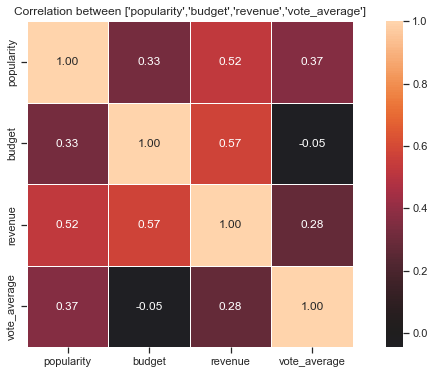

In [31]:
df_heat=dfr[['popularity','budget','revenue','vote_average']]
corr=df_heat.corr()
mask = np.zeros_like(corr)
fig ,ax= plt.subplots(figsize=(12, 6))
ax = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', center=0,square=True,linewidths=.5)
ax.set_title("Correlation between ['popularity','budget','revenue','vote_average']")
fig.savefig('Heat_map_revenue.png')

#### As we see=>
##### -correlation between revenue and Budget is (0.57) that mean as u invest in the film it may gain high profit.
##### -Relations between revenue and popularity is (0.52) that mean u should prepare a good marketing plan for the movie it gonna lead to high profit.

<AxesSubplot:title={'center':'Month_Rev'}, xlabel='Month', ylabel='Count'>

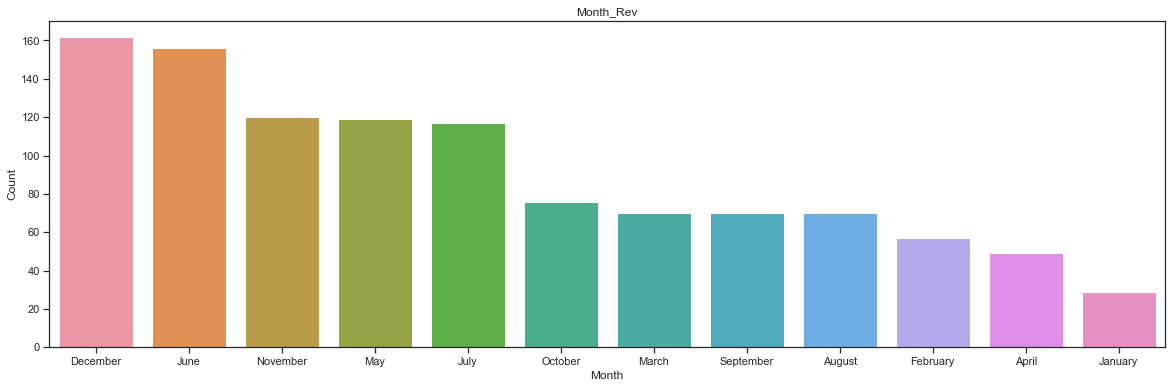

In [32]:
bar_sea(dfr,'release_month','index','Month',"Count",'Month_rev',(20,6),'Month_rev')

### From this bar chart we can say that if u release a movie in [December,June] you gonna have better chances to gain high revenue ...

In [33]:
fig,ax=plt.subplots(figsize=(20, 6))
ax=sns.barplot(data=dfr.head(25),x='original_title',y='revenue',)
ax.set_xlabel("Movie Title")
ax.set_ylabel("revenue")
ax.set_title("Top 25 Movie based on their revenue")
for i in ax.get_xticklabels():
    i.set_rotation(90)
fig.savefig("Best 25 movie based on their revenue.png")

### The first 25 movies with high revenue .

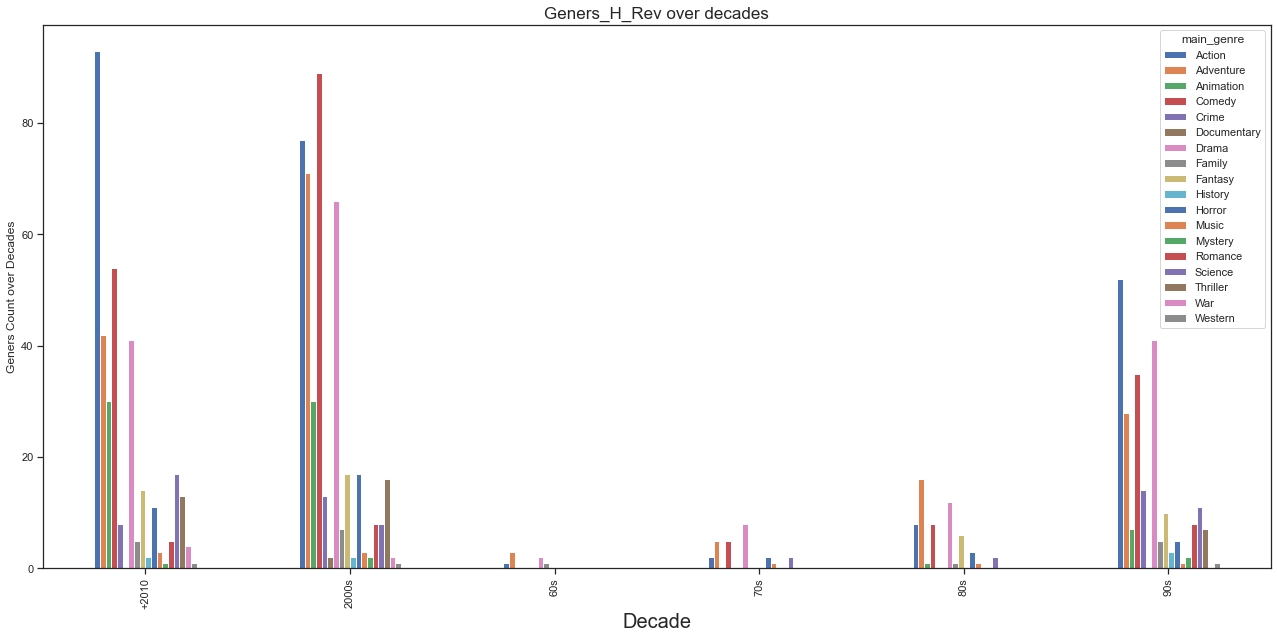

In [34]:
df4=dfr.groupby('Decade',)['main_genre'].value_counts()
df4=df4.unstack(level=1)
fig = df4.plot(kind ="bar", legend = True, figsize = (22, 10),).figure
sns.set_theme(style="ticks")
plt.xlabel("Decade", fontsize= 20)
plt.ylabel("Geners Count over Decades", fontsize= 12)
plt.title('Geners_H_Rev over decades',fontsize= 17)
fig.savefig('gener_by_Decades_rev.png')

###   This Bar chart representing the most profitable genres over decades

In [35]:
bar_sea(dfr,'main_genre','index','genre',"Counts",'main_genre',(20,6),'Count of genere')

<AxesSubplot:title={'center':'Count Of Genere'}, xlabel='Genre', ylabel='Counts'>

##### Action ,Comedy and Drama took first three places based on revenue

In [36]:
dfr['main_actor'].value_counts().head(3)

Tom Cruise            24
Tom Hanks             20
Sylvester Stallone    19
Name: main_actor, dtype: int64

#### The most valuable actor is Tom Cruise

In [37]:
dfr.production_companies.value_counts().head(3)

Paramount Pictures      22
DreamWorks Animation    13
Universal Pictures      13
Name: production_companies, dtype: int64

#### The most valuable production company is Paramount Pictures

In [38]:
dfr.release_year.value_counts().head(3)

2011    67
2013    59
2014    59
Name: release_year, dtype: int64

### In 2011 67 movie their revenue were above the average

In [39]:
dfr.director.value_counts().head(5)

Steven Spielberg    23
Robert Zemeckis     12
Tony Scott          10
Ridley Scott        10
Clint Eastwood      10
Name: director, dtype: int64

#### The most valuable director is Steven Spielberg .

<a id='conclusions'></a>
## Conclusions
##### 1-December and September are the best months to release a movie to gain high popularity.
##### 2-popularity and revenue depends on genre and budget.
##### 3-(Drama ,Comedy and Action) genres can lead to both high popularity and revenue.
##### 4-The most valuable production company is Paramount Pictures.
##### 5-The most valuable actors are Tom Cruise ,Tom Hanks and Sylvester Stallone
##### 6-Popularity depends on the budget.
##### 7-Revenue depends on budget and popularity.
##### 8-The most valuable director is Steven Spielberg .
## Limitation:
##### 1-There a Nan and zeros we handled it.
##### 2-No information about countries.(that could open another area of exploration)

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1